<img src='https://i0.wp.com/glitched.africa/wp-content/uploads/2019/02/blog-fifa-19-cover-new-big.jpg?fit=1920%2C1080&ssl=1' />

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. <br><br>

It was announced on 6th June 2018 in a press conference and was released on 28th September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows. <br><br>

It is the 26th installment in the FIFA series. The game features the UEFA club competitions for the first time, including the UEFA Champions League. <br><br>

This notebook was created to provide information about various aspects of players using interactive plotly visualizations. It also contains machine learning models which is used to classify players based on their position and predict the Overall rating of a player based on the features present in the dataset.<br><br>

The FIFA 19 dataset contains over 18,000 rows with 89 columns. Dataset can be found here - https://www.kaggle.com/karangadiya/fifa19
<br><br><br>

---

### Import required libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

<br><br>
### Read the data

In [3]:
data = pd.read_csv('../input/data.csv')

In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [6]:
print('Number of Categorical Columns: ', len(data.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(data.select_dtypes(exclude=object).columns))

Number of Categorical Columns:  45
Number of Numerical Columns:  44


We have a dataset with 18,207 rows which includes 45 categorical features and 44 numerical features.

<br><br>
### Dealing with unnecessary features and missing values

In [7]:
#Dropping columns which are of very less significance.
data.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face', 'Release Clause',
                   'Joined', 'Contract Valid Until'], inplace=True)

In [8]:
#Check for missing values in columns where missing values is more than half of the total number of values.
data.isnull().sum()[data.isnull().sum() >= 9000]

Loaned From    16943
dtype: int64

In [9]:
#Dropping column based on above condition
data.drop(columns=['Loaned From'], inplace=True)

In [10]:
data.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
          

Still a lot of missing values to deal with. Let us fill in these missing values appropriately and/or drop columns which are not required. <br><br>

In [11]:
#Players who are not part of any club.
data['Club'].fillna(value='No Club', inplace=True)

In [12]:
data[data['Preferred Foot'].isna()].head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13236,J. McNulty,33,Scotland,62,62,Rochdale,€120K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,J. Stead,35,England,62,62,Notts County,€140K,€3K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,A. Semprini,20,Italy,62,72,Brescia,€425K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,R. Bingham,24,England,62,66,Hamilton Academical FC,€400K,€1K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Full of NaN values for many features, so drop.
data.drop(index=data[data['Preferred Foot'].isna()].index, inplace=True)

In [14]:
data[data['Position'].isna()][['Name', 'Nationality', 'LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                              'LAM', 'CAM', 'RAM', 'LM', 'LCM','CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                              'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,Name,Nationality,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
5018,R. Raldes,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6736,J. Arce,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7922,L. Gutiérrez,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9905,R. Vargas,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10628,D. Bejarano,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Can fill in position manually but LS, RS, CF, etc. features have no values, so drop them.
data.drop(index=data[data['Position'].isna()].index, inplace=True)

In [16]:
#Checking the number of missing values in the remaining columns.
data.isnull().sum()[data.isnull().sum() > 0]

LS     2025
ST     2025
RS     2025
LW     2025
LF     2025
CF     2025
RF     2025
RW     2025
LAM    2025
CAM    2025
RAM    2025
LM     2025
LCM    2025
CM     2025
RCM    2025
RM     2025
LWB    2025
LDM    2025
CDM    2025
RDM    2025
RWB    2025
LB     2025
LCB    2025
CB     2025
RCB    2025
RB     2025
dtype: int64

In [17]:
len(data[data['Position'] == 'GK'])

2025

Looks like the above features are not set for Goalkeepers. We cannot drop them as it would remove all the goal keepers from our dataset. Instead we will fill these values with 0.

In [18]:
data.fillna(value=0, inplace=True)

In [19]:
data.isnull().sum().sum()

0

Our dataset does not contain any missing values.<br><br><br>

### Converting categorical features to appropriate numerical features

In [20]:
data.select_dtypes(include=object).columns

Index(['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

In [21]:
#Function to convert value and wage of the player.
def currencyConverter(val):
    if val[-1] == 'M':
        val = val[1:-1]
        val = float(val) * 1000000
        return val
        
    elif val[-1] == 'K':
        val = val[1:-1]
        val = float(val) * 1000
        return val
    
    else:
        return 0

In [22]:
data['Value in Pounds'] = data['Value'].apply(currencyConverter)
data['Wage in Pounds'] = data['Wage'].apply(currencyConverter)

data.drop(columns=['Value', 'Wage'], inplace=True)

data.head()

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value in Pounds,Wage in Pounds
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0,565000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0,405000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0,290000.0
3,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0,260000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0,355000.0


Value and Wage have been converted.
<br><br><br>

In [23]:
data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [24]:
#Function to convert skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [25]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in skill_columns:
    data[col] = data[col].apply(skillConverter)

In [26]:
data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76


Converted to numeric.
<br><br>

In [27]:
data[['Height', 'Weight']].head()

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [28]:
def height_converter(val):
    f = val.split("'")[0]
    i = val.split("'")[1]
    h = (int(f) * 30.48) + (int(i)*2.54)
    return h

def weight_converter(val):
    w = int(val.split('lbs')[0])
    return w

In [29]:
data['Height in Cms'] = data['Height'].apply(height_converter)
data['Weight in Pounds'] = data['Weight'].apply(weight_converter)

data.drop(columns=['Height', 'Weight'], inplace=True)
data[['Height in Cms', 'Weight in Pounds']].head()

,Height in Cms,Weight in Pounds
0,170.18,159
1,187.96,183
2,175.26,150
3,193.04,168
4,180.34,154


<br><br><br>
For the remaining columns - **Work Rate, Body Type, Position**, we will not be converting them to numerical features right now. Here, we ensure these features have appropriate values and they will be converted to numerical features when feeding this data to our machine learning models.

In [30]:
data['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [31]:
data['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [32]:
data['Body Type'][data['Body Type'] == 'Messi'] = 'Lean'
data['Body Type'][data['Body Type'] == 'C. Ronaldo'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Neymar'] = 'Lean'
data['Body Type'][data['Body Type'] == 'Courtois'] = 'Lean'
#PLAYER_BODY_TYPE_25 is the body type of Mohammed Salah who has a Normal body type.
data['Body Type'][data['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Shaqiri'] = 'Stocky'
data['Body Type'][data['Body Type'] == 'Akinfenwa'] = 'Stocky'

In [33]:
print(data['Position'].unique())
print(data['Position'].nunique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']
27


Let us simplify the above positions into 4 simple categories of - **F**orwards, **M**idfielders, **D**efenders and **G**oal**K**eepers

In [34]:
def position_simplifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'F'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'M'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'D'
        return val
    
    else:
        return val
        

In [35]:
data['Position'] = data['Position'].apply(position_simplifier)
data['Position'].value_counts()

M     7589
D     5866
F     2667
GK    2025
Name: Position, dtype: int64

<br><br><br>

### Visualizations
Plotting a few visualizations which give us more information about the dataset.

**Player distribution across Countries**

In [36]:
df_nations = data.groupby(by='Nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count']

In [37]:
df_nations[(df_nations['Nation'] == 'England') | (df_nations['Nation'] == 'Wales') 
           | (df_nations['Nation'] == 'Scotland') | (df_nations['Nation'] == 'Northern Ireland') ]

,Nation,Count
46,England,1657
114,Northern Ireland,79
131,Scotland,283
161,Wales,129


In [38]:
df_temp = pd.DataFrame(data= [['United Kingdom', 2148]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp, ignore_index=True)
df_nations.tail()

,Nation,Count
160,Venezuela,66
161,Wales,129
162,Zambia,9
163,Zimbabwe,13
164,United Kingdom,2148


Adding values of England, Northern Ireland, Scotland and Wales under United Kingdom as our choropleth map considers the following countries as a whole which is included in the United Kingdom.<br>

Hover over the map to confirm the same.

In [39]:
trace2 = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Portland'
             )

layout = go.Layout(title='<b>Number of Players in each Country</b>',
                   geo=dict(showocean=True,
                            oceancolor='#AEDFDF',
                            projection=dict(type='natural earth'),
                        )
                  )

fig = go.Figure(data=[trace2], layout=layout)
py.iplot(fig)

Most players are from European and South American countries.<br><br>
Top 5 countries -
1. Engalnd - 1657
2. Germany - 1195
3. Spain - 1071
4. Argentina - 936
5. France - 911
<br><br>
Hover over the red spot on the map to get the value of United Kingdom which includes England, Scotland, Northern Ireland and Wales.
<br><br><br>

<br><br>
**Age Distribution of Players**

In [40]:
trace1 = go.Histogram(x=data['Age'], nbinsx=55, opacity=0.7)

layout = go.Layout(title='<b>Players Age Distribution<b>',
                   xaxis=dict(title='<b><i>Age</b></i>'),
                   yaxis=dict(title='<b><i>Count</b></i>'),
                  )

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

Most players age lie in the range of 19 to 29.<br><br><br>

**Player Height and Weight distibution**

In [41]:
fig = tools.make_subplots(rows=1, cols=2)

trace7a = go.Histogram(x=data['Height in Cms'], nbinsx=25, opacity=0.7, name='Height in cms')
trace7b = go.Histogram(x=data['Weight in Pounds'], nbinsx=30, opacity=0.7, name='Weight in Pounds')

fig.append_trace(trace7a, 1,1)
fig.append_trace(trace7b, 1,2)

fig['layout'].update(title='<b>Height & Weight Distribution</b>', \
                     xaxis=dict(automargin=True),
                     yaxis=dict(title='<b><i>Count</b></i>')
                    )
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Majority of the players height lie in the range of 175cms to 190cms.<br>
Majority of the players weight lie in the range of 150lbs to 174lbs.<br><br><br><br>

**Number of players in each Position**

In [42]:
trace6 = go.Pie(values=data['Position'].value_counts().values,
                labels=data['Position'].value_counts().index.values,
                hole=0.3
               )
 

layout = go.Layout(title='<b>Distribution of Players Position-Wise</b>')

fig = go.Figure(data=[trace6], layout=layout)
py.iplot(fig)

Number of players in each position -
1. Midfielders = 7589
2. Defenders = 5866
3. Forwards = 2667
4. Goal Keepers = 2025
<br><br><br>

**Are the players Right Footed  or Left Footed?**

In [43]:
trace3 = go.Pie(values=data['Preferred Foot'].value_counts().values,
                 labels=data['Preferred Foot'].value_counts().index.values,
                 hole=0.3
                )
 

layout = go.Layout(title='<b>Preferred Foot</b>')

fig = go.Figure(data=[trace3], layout=layout)
py.iplot(fig)

Majority of the players prefer their Right foot.<br><br>
Right Foot = 13,938<br>
Left Foot = 4,209

<br><br><br><br>

**Does Overall depend on Work Rate?**

In [44]:
trace4 = go.Violin(x=data['Work Rate'],
                y=data['Overall']
               )

layout = go.Layout(title='<b>Work Rate vs Overall</b>',
                   xaxis=dict(title='<b><i>Work Rate</b></i>'),
                   yaxis=dict(title='<b><i>Overall</b></i>')
                  )

fig = go.Figure(data=[trace4], layout=layout)
py.iplot(fig)

From the above visualization, it is clear that players have almost similar Overall ratings across different Work Rates.
<br><br><br><br>

**Player Attributes based on Position**

In [45]:
#We are choosing 6 attributes here. We are grouping the data by Position and finding the average of our 6 attributes.
df_skills = data.groupby(by='Position')['Crossing', 'Finishing', 'FKAccuracy', 
                            'StandingTackle', 'Marking', 'Interceptions'].mean().reset_index()

In [46]:
trace5a = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'F'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Forwards'
                         )

trace5b = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'M'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Midfielders'
                         )

trace5c = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'D'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Defenders'
                         )


trace5d = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'GK'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Goal Keepers'
                         )

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,
                                              range=[0, 100]
                                             )
                             
                             ),
                   showlegend=True,
                   title='<b>Attributes by Position</b>'
                  )

fig = go.Figure(data=[trace5a, trace5b, trace5c, trace5d], layout=layout)
py.iplot(fig)

No surprise with Defenders scoring the highest in defending attributes such as StandingTackle, Marking and Interceptions.<br><br>
Midfielders seem like all rounders. They are good at everything but excel in Crossing and FKAccuracy.<br><br>
Forwards' main job is to score goals. Hence, it is expected they score the highest in Finishing.<br><br><br><br>


### Classification based on Position

**Import required libraries**

In [47]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

In [48]:
#Transforming categorical feature into numeric.
#Goal Keeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
def pos_numeric(val):
    if val == 'GK':
        return 0
    elif val == 'D':
        return 1
    elif val == 'M':
        return 2
    else:
        return 3
    
data['Position'] = data['Position'].apply(pos_numeric)

In [49]:
df_pos = data.copy()

#Dropping unnecessary columns
df_pos.drop(columns=['Name', 'Nationality', 'Club'], inplace=True)

In [50]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [51]:
#Splitting dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Logisitic Regression model**

In [52]:
logmodel = LogisticRegression()

In [53]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
prediction = logmodel.predict(X_test)

In [55]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       0.92      0.85      0.88      1922
           2       0.82      0.91      0.86      2544
           3       0.87      0.73      0.79       866

   micro avg       0.88      0.88      0.88      5989
   macro avg       0.90      0.87      0.88      5989
weighted avg       0.88      0.88      0.87      5989



[[ 657    0    0    0]
 [   0 1639  283    0]
 [   0  133 2313   98]
 [   0   14  219  633]]


Accuracy Score:  0.8752713307730839


Just by dropping a few columns and without any fine tuning, the Logisitic Regression model gets a pretty good accuracy score.<br><br>
Notice the 100% accuracy while classifying Goal Keepers. This is expected as the features such as LS, RS, CF, etc. is equal to 0 for all the goal keepers in our dataset.<br><br>
Let us try to increase the accuracy in classifying other positions.
<br><br><br><br>

**Correlation between Position and other features**

In [56]:
df_pos.corr().abs()['Position'].sort_values(ascending=False)

Position                    1.000000
Finishing                   0.824777
LS                          0.764850
ST                          0.764850
RS                          0.764850
Positioning                 0.760926
RF                          0.750532
CF                          0.750532
LF                          0.750532
Penalties                   0.743087
Volleys                     0.742479
RW                          0.729755
LW                          0.729755
CAM                         0.727863
RAM                         0.727863
LAM                         0.727863
LongShots                   0.716903
LM                          0.701364
RM                          0.701364
Dribbling                   0.696398
ShotPower                   0.687332
BallControl                 0.669807
GKDiving                    0.637548
LCM                         0.637297
CM                          0.637297
RCM                         0.637297
GKReflexes                  0.636032
G

Notice how similar features such as LS, RS and CAM, LAM, RAM and so on have similar correlation. Let us combine such features into individual single features.

In [57]:
df_pos['Frw'] = (df_pos['RF'] + df_pos['ST'] + df_pos['LF'] + df_pos['RS'] + df_pos['LS'] + df_pos['CF']) / 6

df_pos['Mid'] = (df_pos['LW'] + df_pos['RCM'] + df_pos['LCM'] + df_pos['LDM'] + df_pos['CAM'] + df_pos['CDM'] + \
                df_pos['RM'] + df_pos['LAM'] + df_pos['LM'] + df_pos['RDM'] + df_pos['RW'] + df_pos['CM'] + df_pos['RAM'])\
                /13

df_pos['Def'] = (df_pos['RCB'] + df_pos['CB'] + df_pos['LCB'] + df_pos['LB'] + df_pos['RB'] + df_pos['RWB']\
                 + df_pos['LWB']) / 7

df_pos['Gk'] = (df_pos['GKDiving'] + df_pos['GKHandling'] + df_pos['GKKicking'] + df_pos['GKPositioning']\
               + df_pos['GKReflexes']) / 5

df_pos.drop(columns=['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM',
                     'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB',
                     'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
                    ], inplace=True)

In [58]:
print('Correlation with Position: ', df_pos.corr().abs()['Position'].sort_values(ascending=False).index, '\n')
print('Categorical columns in dataset: ', df_pos.select_dtypes(include=object).columns, '\n')
print('Number of features in dataset: ', len(df_pos.columns))

Correlation with Position:  Index(['Position', 'Finishing', 'Positioning', 'Frw', 'Penalties', 'Volleys',
       'LongShots', 'Dribbling', 'ShotPower', 'BallControl', 'Mid', 'Gk',
       'Skill Moves', 'Curve', 'ShortPassing', 'Agility', 'FKAccuracy',
       'Vision', 'Acceleration', 'SprintSpeed', 'HeadingAccuracy', 'Balance',
       'Crossing', 'Stamina', 'Def', 'LongPassing', 'Composure',
       'Height in Cms', 'Weak Foot', 'Weight in Pounds', 'Aggression',
       'SlidingTackle', 'Reactions', 'Interceptions', 'StandingTackle',
       'Potential', 'Age', 'Value in Pounds', 'Jumping', 'Jersey Number',
       'Wage in Pounds', 'Overall', 'Marking', 'International Reputation',
       'Strength'],
      dtype='object') 

Categorical columns in dataset:  Index(['Preferred Foot', 'Work Rate', 'Body Type'], dtype='object') 

Number of features in dataset:  48


By combining certain features, we have brought down the nubmber of features from 75 to 48.<br><br><br>

**Dropping columns with lower correlation**

In [59]:
#df_pos = data.copy()
#Dropping Preferred Foot column too as it does not play a significant role in classifying the position of the player. 
df_pos.drop(columns=['StandingTackle', 'Potential', 'Age', 'Value in Pounds', 
                     'Jumping', 'Jersey Number', 'Wage in Pounds', 'Overall', 'Marking',
                     'International Reputation', 'Strength', 'Preferred Foot'], inplace=True)

In [60]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Logistic Regression model after dropping lower correlated features**

In [62]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
prediction = logmodel.predict(X_test)

In [64]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       0.92      0.92      0.92      1922
           2       0.89      0.89      0.89      2544
           3       0.85      0.85      0.85       866

   micro avg       0.90      0.90      0.90      5989
   macro avg       0.91      0.91      0.91      5989
weighted avg       0.90      0.90      0.90      5989



[[ 657    0    0    0]
 [   0 1769  151    2]
 [   0  161 2259  124]
 [   0    3  131  732]]


Accuracy Score:  0.9044915678744365


The new Logisitic Regression model does a better job than the previous model. <br><br>
It is able to better classify Defenders and Midfielders. However, accuracy of classifying Forwards goes down.
<br><br><br><br><br>

**Removing outliers**

In [65]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 12, 8

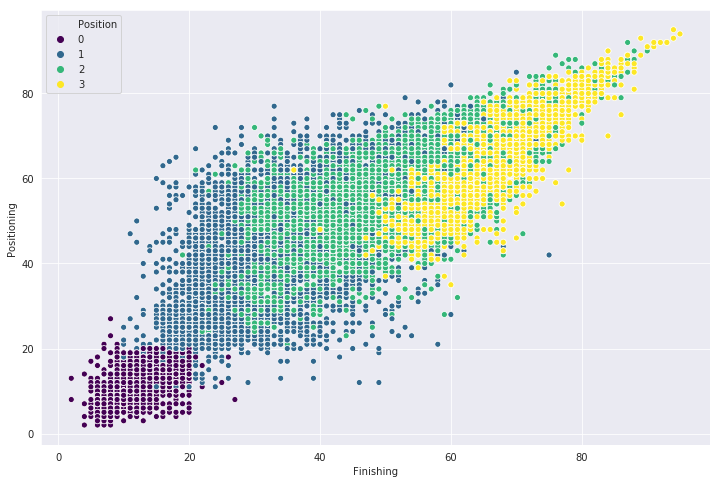

In [66]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

From the above visualization, you can notice several outliers. Let us remove them.

In [67]:
df_pos = df_pos[~((df_pos['Position'] == 1) & (df_pos['Finishing'] > 30) & (df_pos['Positioning'] < 60))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 60) & (df_pos['Positioning'] < 80))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 45))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 60) & (df_pos['Positioning'] > 70))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 65) & (df_pos['Positioning'] > 70))]

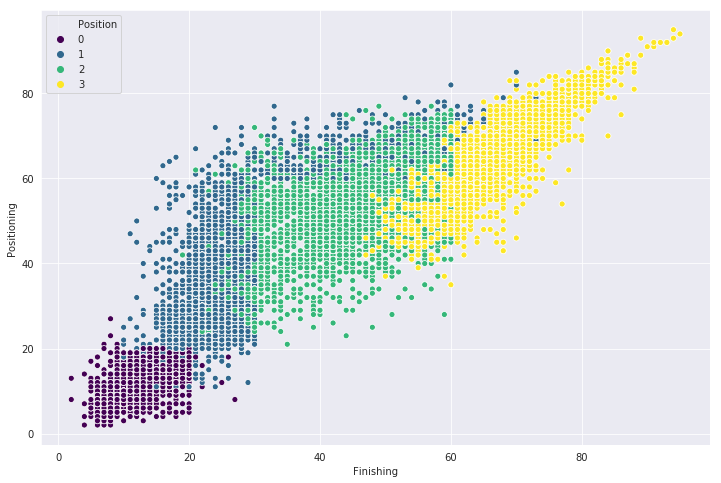

In [68]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

There are still several outliers present but if we try and remove them, it might lead to overfitting.<br><br>
Let us now test our model after removing outliers.

**Logistic Regression Model**

In [69]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
prediction = logmodel.predict(X_test)

In [71]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       675
           1       0.92      0.90      0.91      1125
           2       0.91      0.92      0.91      1613
           3       0.94      0.94      0.94       856

   micro avg       0.93      0.93      0.93      4269
   macro avg       0.94      0.94      0.94      4269
weighted avg       0.93      0.93      0.93      4269



[[ 675    0    0    0]
 [   0 1018  104    3]
 [   0   86 1478   49]
 [   0    1   47  808]]


Accuracy Score:  0.9320684000936987


The overall accuracy of the model increases. Our model is now able to better classify Midfielders and Forwards.<br><br>
Let us feed the above data into a different classification model and see how it performs.<br><br><br><br>

**Gradient Boosting Classifier**

In [72]:
gbclassifier = GradientBoostingClassifier()

In [73]:
gbclassifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [74]:
prediction = gbclassifier.predict(X_test)

In [75]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       675
           1       0.94      0.96      0.95      1125
           2       0.95      0.95      0.95      1613
           3       0.97      0.96      0.97       856

   micro avg       0.96      0.96      0.96      4269
   macro avg       0.97      0.97      0.97      4269
weighted avg       0.96      0.96      0.96      4269



[[ 675    0    0    0]
 [   0 1080   44    1]
 [   0   62 1527   24]
 [   0    2   30  824]]


Accuracy Score:  0.9618177559147342


The Gradient Boosting Classifier performs much better than the Logistic Regression model as expected and gets a very high accuracy score.
<br><br><br>


<br>

----

<br>
### Predicting *Overall* from the dataset.

In [76]:
df_ovr = data.copy()
df_ovr.drop(columns=['Name', 'Nationality', 'Club'], inplace=True)

In [77]:
X = df_ovr.drop(columns=['Overall'])
X = pd.get_dummies(X)
y = df_ovr['Overall']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Linear Regression Model**

In [79]:
linmodel = LinearRegression()

In [80]:
linmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
pred = linmodel.predict(X_test)

In [82]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('r^2 score: ', r2_score(y_test, pred))

RMSE: 1.7272830720312393
r^2 score:  0.9364539724794638


An r2_score of 0.9364 is good where 1.0 is the best possible r2_score.<br><br>
Let us see if we can better this.<br><br><br>

**Correlation and Outliers**

In [83]:
df_ovr.corr().abs()['Overall'].sort_values(ascending=False)

Overall                     1.000000
Reactions                   0.850071
Composure                   0.727646
Potential                   0.660947
Value in Pounds             0.627025
Wage in Pounds              0.571795
ShortPassing                0.502275
International Reputation    0.499596
Vision                      0.498683
LongPassing                 0.483639
BallControl                 0.460034
Age                         0.453354
ShotPower                   0.441080
LongShots                   0.420791
Curve                       0.419501
Skill Moves                 0.414363
FKAccuracy                  0.397004
Aggression                  0.395142
Crossing                    0.394849
Volleys                     0.391445
Dribbling                   0.372358
Stamina                     0.365652
RCM                         0.365423
LCM                         0.365423
CM                          0.365423
Positioning                 0.356497
Strength                    0.349318
C

In [84]:
#Dropping Height in Cms because of a very low correlation with Overall.
#Not dropping GK because it would be one of the features to predict Overall for goalkeepers.
df_ovr.drop(columns=['Height in Cms'], inplace=True)

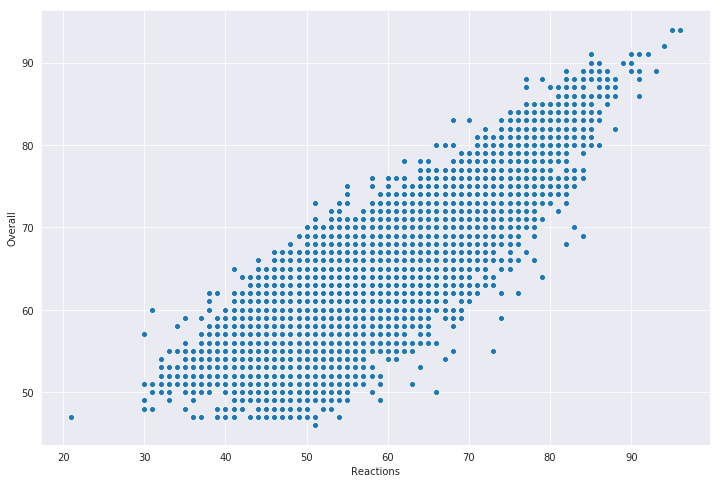

In [85]:
sns.scatterplot(data=df_ovr, x='Reactions', y='Overall')
plt.show()

In [86]:
df_ovr = df_ovr[~((df_ovr['Reactions'] < 25))]
df_ovr = df_ovr[~((df_ovr['Reactions'] < 35) & (df_ovr['Overall'] > 55))]
df_ovr = df_ovr[~((df_ovr['Reactions'] < 35) & (df_ovr['Overall'] > 55))]
df_ovr = df_ovr[~((df_ovr['Reactions'] > 62) & (df_ovr['Overall'] < 55) & (df_ovr['Reactions'] < 70))]

df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 73) & (df_ovr['Overall'] == 55)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 74) & (df_ovr['Overall'] == 59)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 79) & (df_ovr['Overall'] == 64)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 82) & (df_ovr['Overall'] == 68)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 83) & (df_ovr['Overall'] == 70)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 84) & (df_ovr['Overall'] == 69)].index, inplace=True)

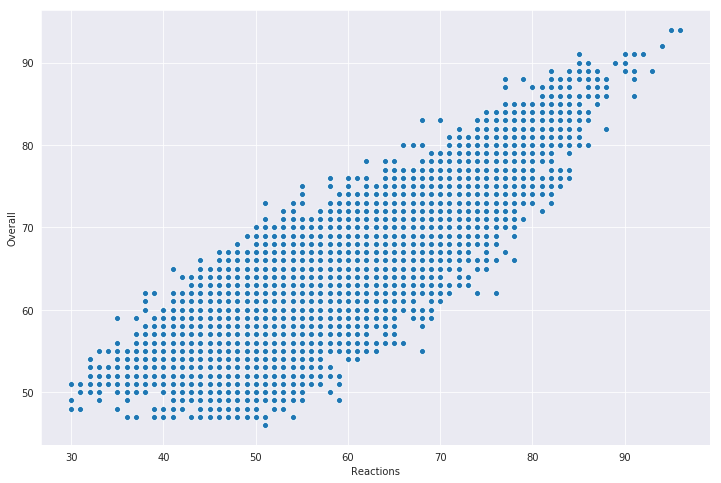

In [87]:
sns.scatterplot(data=df_ovr, x='Reactions', y='Overall')
plt.show()

After removing outliers.<br><br><br>

**Linear Regression Model**

In [88]:
X = df_ovr.drop(columns=['Overall'])
X = pd.get_dummies(X)
y = df_ovr['Overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
linmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
pred = linmodel.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('r^2 score: ', r2_score(y_test, pred))

RMSE: 1.715365074105216
r^2 score:  0.9382640578763136


The Linear Regression model does slightly better than the previous model. <br><br>
RMSE Score comes down while there is asmall increase in r2_score. <br><br><br>

**Gradient Boosting Regressor**

In [91]:
X = df_ovr.drop(columns=['Overall'])
X = pd.get_dummies(X)
y = df_ovr['Overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
gbregressor = GradientBoostingRegressor()

In [93]:
gbregressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
pred = gbregressor.predict(X_test)

In [95]:
pred = gbregressor.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('r^2 score: ', r2_score(y_test, pred))

RMSE: 0.6864287693925339
r^2 score:  0.9901141069462454


A huge improvement using the Gradient Boosting Regressor.<br>

RMSE Score comes down to 0.6868, while r2_score is very close to 1.